# Gradient Descent

We are going to perform Linear Regression with Gradient Descent on [Nutrition Facts for McDonald's Menu](https://www.kaggle.com/mcdonalds/nutrition-facts) dataset.

### Read and explore the data

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read first 100 rows of the dataset
menu = pd.read_csv("menu.csv", nrows=100)

menu[["Category", "Item", "Serving Size", "Calories"]].head()

,Category,Item,Serving Size,Calories
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300
1,Breakfast,Egg White Delight,4.8 oz (135 g),250
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400


Obtain serving size in grams from provided serving size and display the data again.

In [50]:
# Use simple string operations to extract the the number of grams from serving size
menu["Serving Size (grams)"] = menu["Serving Size"].apply(lambda s: int(s.split(" ")[2][1:]))

menu[["Category", "Item", "Serving Size (grams)", "Calories"]].head()

,Category,Item,Serving Size (grams),Calories
0,Breakfast,Egg McMuffin,136,300
1,Breakfast,Egg White Delight,135,250
2,Breakfast,Sausage McMuffin,111,370
3,Breakfast,Sausage McMuffin with Egg,161,450
4,Breakfast,Sausage McMuffin with Egg Whites,161,400


### Extract calories and serving size from the dataset

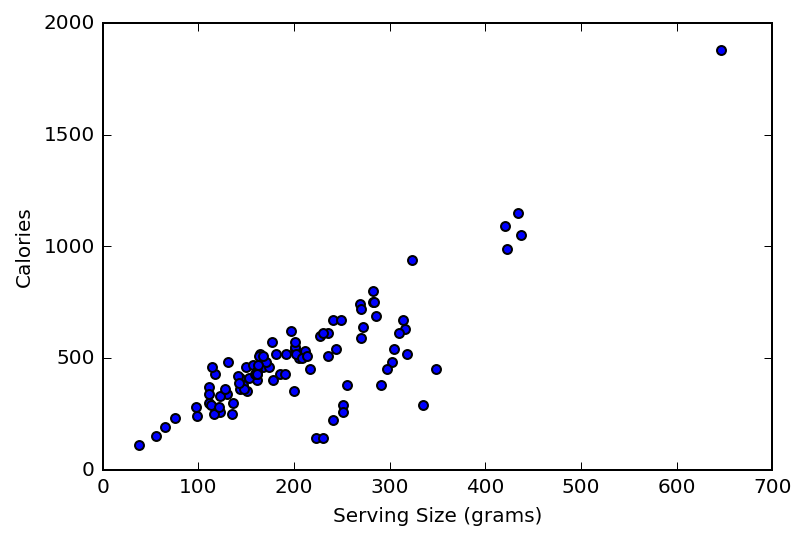

In [51]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# The serving size will be considered as input x and
# number of calories will be the target variable y
# Our model: y = mx + c

serving_size = np.array(menu["Serving Size (grams)"])
calories = np.array(menu["Calories"])

# Plot the data
plt.scatter(serving_size, calories)
plt.xlabel("Serving Size (grams)")
plt.ylabel("Calories")
plt.show()

### Normalize the data

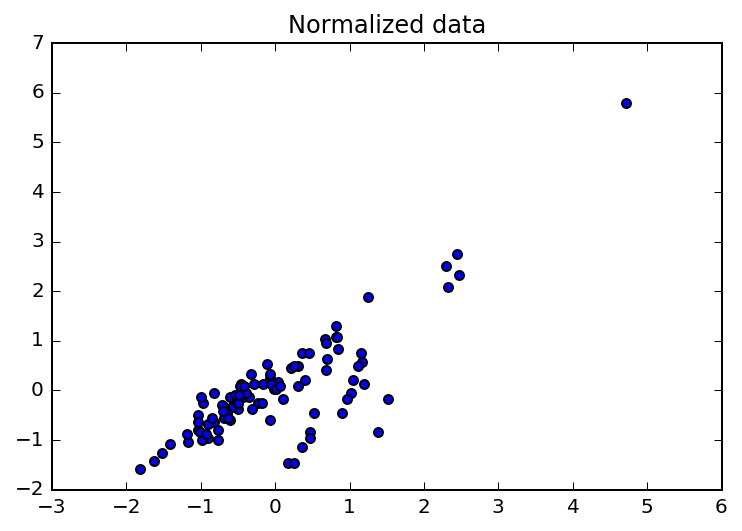

In [54]:
# Since calories range almost upto 2000 and
# serving size goes only until around 650,
# it would be better to normalize the data

serving_size_norm = (serving_size - np.mean(serving_size))/np.std(serving_size)
calories_norm = (calories - np.mean(calories))/np.std(calories)

plt.scatter(serving_size_norm, calories_norm)
plt.title("Normalized data")
plt.show()

### Set Hyperparameters

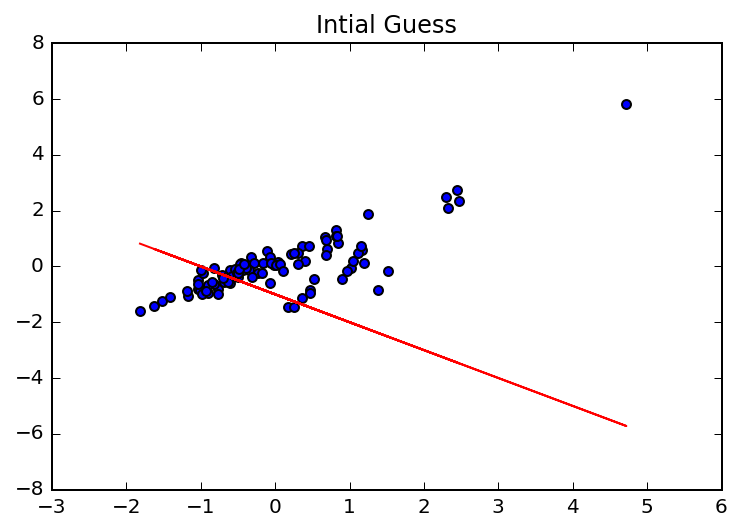

In [59]:
# Hyperparameters
m = -1 # initial guess of slope
c = -1 # initial guess of y-intercept
alpha = 0.001 # learning rate
n_iter = 1000 # Number of iterations

# List to store MSE at each step of training
errors = []

# Initial guess of predicted calories
calories_pred = m * serving_size_norm + c

# Plot the initial guess
plt.scatter(serving_size_norm, calories_norm)
plt.plot(serving_size_norm, calories_pred, c="r")
plt.title("Intial Guess")
plt.show()

### Define a funtion to compute mean squared error

In [60]:
def compute_mse(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)/float(len(y_true))

### Define a function to print model statistics

In [61]:
def print_stats(n_iter, m, c, error):
    print("After {0} iterations, Error = {1}, m = {2} and c = {3}".format(n_iter, error, m, c))

### Define a function to calculate updated parameters

In [62]:
def compute_parameter_updates(X, y, m, c, learning_rate):
    N = float(len(X))
    
    # Use vectorized operation of matrix multiplication
    # to calculate gradients without for loops
    m_gradient = np.sum((-2/N) * X * (y - (m*X + c)))
    c_gradient = np.sum((-2/N) * (y - (m*X + c)))
    
    # Update the parameters
    m_updated = m - (learning_rate * m_gradient)
    c_updated = c - (learning_rate * c_gradient)
    
    return m_updated, c_updated

### Run gradient descent

In [63]:
for i in range(1, n_iter + 1):
    # Calculate updated parameters
    m, c = compute_parameter_updates(serving_size_norm, calories_norm, m, c, alpha)
    # Save error for each step
    errors.append(compute_mse(calories_norm, (m*serving_size_norm + c)))
    # Print model stats at every 100 iterations
    if not i % 100:
        print_stats(i, m, c, errors[i-1])

After 100 iterations, Error = 3.209315940917094, m = -0.6715590130175618 and c = -0.8185668046884281
After 200 iterations, Error = 2.263738371903742, m = -0.4027081237746339 and c = -0.6700516137378232
After 300 iterations, Error = 1.6301525958720575, m = -0.18263571042940804 and c = -0.5484820084336945
After 400 iterations, Error = 1.2056174242006972, m = -0.0024917382373357 and c = -0.44896916507266055
After 500 iterations, Error = 0.9211569473338382, m = 0.14496813746380993 and c = -0.3675112548571591
After 600 iterations, Error = 0.730553745764569, m = 0.26567389673624936 and c = -0.3008325135754589
After 700 iterations, Error = 0.6028397629694845, m = 0.36447962441138093 and c = -0.24625150938385149
After 800 iterations, Error = 0.5172648027007535, m = 0.4453587131993284 and c = -0.20157331118604171
After 900 iterations, Error = 0.45992516247714055, m = 0.5115636504745898 and c = -0.16500122124802424
After 1000 iterations, Error = 0.42150464401416216, m = 0.5657568144345988 and c 

### Plot the line obtained after training

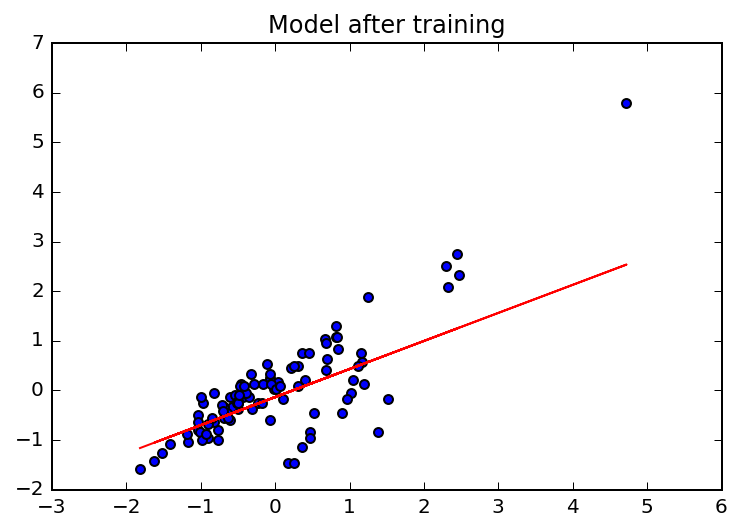

In [66]:
# Predict the calories
calories_pred = (m * serving_size_norm) + c

# Plot the line
plt.scatter(serving_size_norm, calories_norm)
plt.plot(serving_size_norm, calories_pred, c="r")
plt.title("Model after training")
plt.show()

### Plot error rates for training

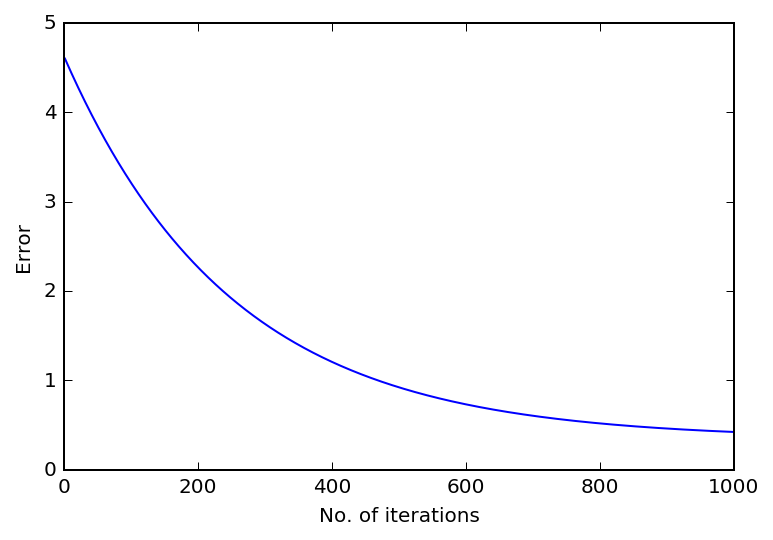

In [67]:
# Plot the error values against number of iterations
plt.plot(list(range(1, 1001)), errors)
plt.xlabel("No. of iterations")
plt.ylabel("Error")
plt.show()

We can see that the error decreased gradually as the model training progressed.